In [135]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from least_squares_helpers import *
from proj1_helpers import *
from implementations import *
from process_data import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [137]:
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [138]:
data = tX.copy()

## Do your thing crazy machine learning thing here :) ...

***Obtaining train & test data***

In [139]:
x_train, x_test, y_train, y_test = split_data(data, y, 0.8)

In [140]:
x_train_clean = initial_process_data(x_train)
x_test_clean = initial_process_data(x_test)

In [141]:
print("x_train shape = {l}".format(l=x_train_clean.shape))
print("y_train shape = {l}".format(l=y_train.shape))
print("x_test shape = {l}".format(l=x_test_clean.shape))
print("y_test shape = {l}".format(l=y_test.shape))

x_train shape = (200000, 31)
y_train shape = (200000,)
x_test shape = (50000, 31)
y_test shape = (50000,)


***1. Linear regression functions***

_A. least_squares_GD function & test_

In [142]:
#Create arrays that stores the evolution of loss and accuracy during training
losses_train1 = []
losses_test1 = []
accuracies_train1 = []
accuracies_test1 = []

In [143]:
def least_squares_GD(y, tx, initial_w, max_iters, gamma):
    """Least squares using gradient descent and keeps track of the loss and accuracy evolution."""
    w = initial_w
    
    for n_iter in range(max_iters):
        gradient = compute_gradient_MSE_loss(y, tx, w)
        loss = MSE_loss(y, tx, w)
        losses_train1.append(loss)
        losses_test1.append(MSE_loss(y_test, x_test_clean, w))
        w -= gamma * gradient

        y_pred = predict_labels(w, tx)
        accuracy = compute_accuracy(y, y_pred)
        accuracies_train1.append(accuracy)
        y_pred_test = predict_labels(w, x_test_clean)
        accuracies_test1.append(compute_accuracy(y_test, y_pred_test))
    return w, loss

In [144]:
initial_w = np.zeros(x_train_clean.shape[1])
max_iters = 1000
gamma = 0.1

# Compute w using least squares gradient descent.
w, loss = least_squares_GD(y_train, x_train_clean, initial_w, max_iters, gamma)

#Compute the training accuracy
y_pred_train = predict_labels(w, x_train_clean)
accuracy_train = compute_accuracy(y_train, y_pred_train)

#Compute the test accuracy
y_pred_test = predict_labels(w, x_test_clean)
accuracy_test = compute_accuracy(y_test, y_pred_test)

In [145]:
print("train loss = {l}".format(l=loss))
print("test loss = {l}".format(l=MSE_loss(y_test, x_test_clean, w)))
print("train accuracy = {a}".format(a=accuracy_train))
print("test accuracy = {a}".format(a=accuracy_test))

train loss = 0.3415142159757101
test loss = 0.34313222247574304
train accuracy = 0.744675
test accuracy = 0.7449


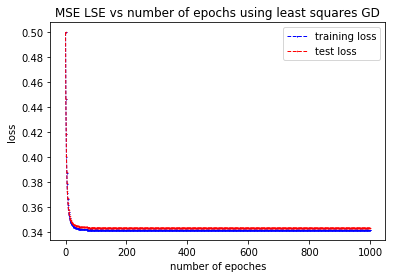

In [146]:
# Plot the loss against the number of iteration (Least squares GD)
x = list(range(max_iters))
plt.plot(x, losses_train1, color='blue', marker='+', linestyle='dashed', label="training loss", markersize=1, linewidth=1)
plt.plot(x, losses_test1, color='red', marker='.', linestyle='dashed', label="test loss", markersize=1, linewidth=1)
plt.legend()
plt.title("MSE LSE vs number of epochs using least squares GD")
plt.xlabel("number of epoches")
plt.ylabel("loss")
plt.show()

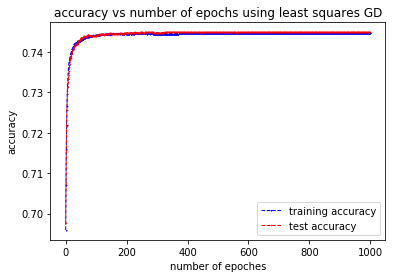

In [147]:
# Plot the accuracy against the number of iteration (Least squares GD)
x = list(range(max_iters))
plt.plot(x, accuracies_train1, color='blue', marker='+', linestyle='dashed', label="training accuracy", markersize=1, linewidth=1)
plt.plot(x, accuracies_test1, color='red', marker='.', linestyle='dashed', label="test accuracy", markersize=1, linewidth=1)
plt.legend()
plt.title("accuracy vs number of epochs using least squares GD")
plt.xlabel("number of epoches")
plt.ylabel("accuracy")
plt.show()

_B. least_squares_SGD function & test_

In [148]:
#Create arrays that stores the evolution of loss and accuracy during training
losses_train2 = []
losses_test2 = []
accuracies_train2 = []
accuracies_test2 = []

In [149]:
def least_squares_SGD(y, tx, initial_w, max_iters, gamma):
    """Least squares using stochastic gradient descent and keeps track of the loss and accuracy evolution."""
    # Define parameters to store w and loss
    w = initial_w
    
    for n_iter in range(max_iters):
        for batch_y, batch_x in batch_iter(y, tx, batch_size=1, num_batches=len(tx)):
            stochastic_gradient = compute_gradient_MSE_loss(batch_y, batch_x, w)
            w -= gamma * stochastic_gradient
        
        loss = MSE_loss(y, tx, w)
        losses_train2.append(loss)
        losses_test2.append(MSE_loss(y_test, x_test_clean, w))
        
        y_pred = predict_labels(w, tx)
        accuracy = compute_accuracy(y, y_pred)
        accuracies_train2.append(accuracy)
        y_pred_test = predict_labels(w, x_test_clean)
        accuracies_test2.append(compute_accuracy(y_test, y_pred_test))
        
    return w, loss

In [150]:
initial_w = np.zeros(x_train_clean.shape[1])
max_iters = 50
gamma = 0.000001

# Compute w using least squares stochastic gradient descent.
w, loss = least_squares_SGD(y_train, x_train_clean, initial_w, max_iters, gamma)

#Compute the training accuracy
y_pred_train = predict_labels(w, x_train_clean)
accuracy_train = compute_accuracy(y_train, y_pred_train)

#Compute the test accuracy
y_pred_test = predict_labels(w, x_test_clean)
accuracy_test = compute_accuracy(y_test, y_pred_test)

In [151]:
print("train loss = {l}".format(l=loss))
print("test loss = {l}".format(l=MSE_loss(y_test, x_test_clean, w)))
print("train accuracy = {a}".format(a=accuracy_train))
print("test accuracy = {a}".format(a=accuracy_test))

train loss = 0.34163072046286325
test loss = 0.3432346816343981
train accuracy = 0.744235
test accuracy = 0.74408


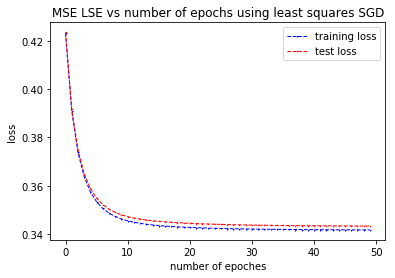

In [152]:
# Plot the loss against the number of iteration (Least squares SGD)
x = list(range(max_iters))
plt.plot(x, losses_train2, color='blue', marker='+', linestyle='dashed', label="training loss", markersize=1, linewidth=1)
plt.plot(x, losses_test2, color='red', marker='.', linestyle='dashed', label="test loss", markersize=1, linewidth=1)
plt.legend()
plt.title("MSE LSE vs number of epochs using least squares SGD")
plt.xlabel("number of epoches")
plt.ylabel("loss")
plt.show()

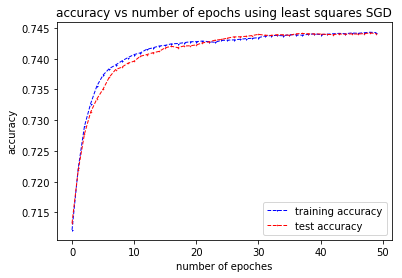

In [153]:
# Plot the accuracy against the number of iteration (Least squares SGD)
x = list(range(max_iters))
plt.plot(x, accuracies_train2, color='blue', marker='+', linestyle='dashed', label="training accuracy", markersize=1, linewidth=1)
plt.plot(x, accuracies_test2, color='red', marker='.', linestyle='dashed', label="test accuracy", markersize=1, linewidth=1)
plt.legend()
plt.title("accuracy vs number of epochs using least squares SGD")
plt.xlabel("number of epoches")
plt.ylabel("accuracy")
plt.show()

_C. least_squares function & test_

In [154]:
# Compute w using least squares.
w, train_loss = least_squares(y_train, x_train_clean)

#Compute the training accuracy
y_pred_train = predict_labels(w, x_train_clean)
accuracy_train = compute_accuracy(y_train, y_pred_train)

#Compute the test accuracy
y_pred_test = predict_labels(w, x_test_clean)
accuracy_test = compute_accuracy(y_test, y_pred_test)

In [155]:
print("train loss = {l}".format(l=train_loss))
print("test loss = {l}".format(l=MSE_loss(y_test, x_test_clean, w)))
print("train accuracy = {a}".format(a=accuracy_train))
print("test accuracy = {a}".format(a=accuracy_test))

train loss = 0.3415142158700192
test loss = 0.34313220636403025
train accuracy = 0.74467
test accuracy = 0.7449


_D. ridge regression function & test_

In [156]:
def cross_validation_ridge(y, x, k_indices, k, lambda_):
    """Perform a cross validation using ridge regression."""
    # Create indices and split data. 
    indices_train = k_indices[~(np.arange(k_indices.shape[0]) == k)].reshape(-1)
    indices_test = k_indices[k]
    
    x_tr = x[indices_train]
    x_te = x[indices_test]
    y_tr = y[indices_train]
    y_te = y[indices_test]
    
    x_tr = initial_process_data(x_tr)
    x_te = initial_process_data(x_te)
    
    # Compute w with ridge regression .
    w, loss_tr = ridge_regression(y_tr, x_tr, lambda_)
     
    # Calculate the loss for test data
    loss_te = MSE_loss(y_te, x_te, w)

    return loss_tr, loss_te

In [157]:
nb_fold = 8
k_indices = build_k_indices(y_train, nb_fold, 1)
lambdas = np.logspace(-5, 0, 6)

best_lambda = 0
smallest_loss = float('inf')

losses_tr = []
losses_te = []

# Test different lambdas values for the ridge regression using cross validation.
for lambda_ in lambdas:
    losses_l_tr = []
    losses_l_te = []
    for k in range(nb_fold):
        loss_tr, loss_te = cross_validation_ridge(y_train, x_train, k_indices, k, lambda_)
        losses_l_tr.append(loss_tr)
        losses_l_te.append(loss_te)
        
        if loss_te < loss:
            smallest_loss = loss_te
            best_lambda = lambda_
    losses_tr.append(np.mean(losses_l_tr))
    losses_te.append(np.mean(losses_l_te))
    
            
print("best lambda = {l}".format(l=best_lambda))
print("smallest test loss = {l}".format(l=smallest_loss))

best lambda = 0.1
smallest test loss = 0.3400553406421855


In [158]:
lambda_ = 0.1
# Compute w using ridge regression.
w, train_loss = ridge_regression(y_train, x_train_clean, lambda_)

#Compute the training accuracy
y_pred_train = predict_labels(w, x_train_clean)
accuracy_train = compute_accuracy(y_train, y_pred_train)

#Compute the test accuracy
y_pred_test = predict_labels(w, x_test_clean)
accuracy_test = compute_accuracy(y_test, y_pred_test)

In [159]:
print("train loss = {l}".format(l=train_loss))
print("test loss = {l}".format(l=MSE_loss(y_test, x_test_clean, w)))
print("train accuracy = {a}".format(a=accuracy_train))
print("test accuracy = {a}".format(a=accuracy_test))

train loss = 0.34573968243027314
test loss = 0.3472431676294624
train accuracy = 0.74197
test accuracy = 0.7412


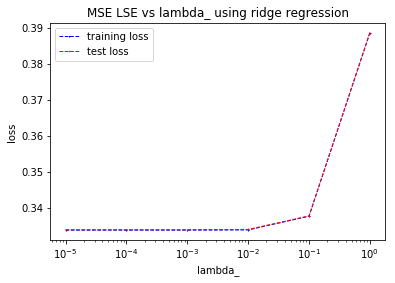

In [160]:
# Plot the loss against the number of iteration (Ridge regression)
plt.plot(lambdas, losses_tr, color='blue', marker='+', linestyle='dashed', label="training loss", markersize=1, linewidth=1)
plt.plot(lambdas, losses_te, color='red', marker='.', linestyle='dashed', label="test loss", markersize=1, linewidth=1)
plt.legend()
plt.title("MSE LSE vs lambda_ using ridge regression")
plt.xscale('log')
plt.xlabel("lambda_")
plt.ylabel("loss")
plt.show()

***2. Logistic regression functions***

In [161]:
# Convert the y vector from -1 and 1 values to 0 and 1 values.
y_0_1_train = y_train.copy()
y_0_1_train[y_0_1_train == -1] = 0
y_0_1_train

array([1., 0., 0., ..., 1., 0., 0.])

In [162]:
# Convert the y vector from -1 and 1 values to 0 and 1 values.
y_0_1_test = y_test.copy()
y_0_1_test[y_0_1_test == -1] = 0
y_0_1_test

array([0., 0., 0., ..., 0., 0., 0.])

_A. Logistic regression & test_

In [163]:
losses_train3 = []
losses_test3 = []
accuracies_train3 = []
accuracies_test3 = []

In [164]:
def logistic_regression(y, tx, initial_w, max_iters, gamma):
    """Logistic regressino using stochastic gradient descent and keeps track of the loss and accuracy evolution."""

    w = initial_w
    prev_loss = float('inf')
    
    for n_iter in range(max_iters):
        for batch_y, batch_x in batch_iter(y, tx, 1, num_batches=len(tx)):
            gradient = compute_gradient_logistic_loss(batch_y, batch_x, w)
            w = w - gamma * gradient
        
   
        loss = logistic_loss(y, tx, w)
        if prev_loss <= loss:
            gamma *= 0.1
        prev_loss = loss
        
        y_pred_train = predict_labels(w, tx)
        y_pred_train[np.where(y_pred_train <= 0.5)] = -1
        y_pred_train[np.where(y_pred_train > 0.5)] = 1
        accuracy_train = compute_accuracy(y_train, y_pred_train)
        
        
        test_loss = logistic_loss(y_0_1_test, x_test_clean, w)
        y_pred_test = predict_labels(w, x_test_clean)
        y_pred_test[np.where(y_pred_test <= 0.5)] = -1
        y_pred_test[np.where(y_pred_test > 0.5)] = 1
        accuracy_test = compute_accuracy(y_test, y_pred_test)
        
        losses_train3.append(loss)
        losses_test3.append(test_loss)
        accuracies_train3.append(accuracy_train)
        accuracies_test3.append(accuracy_test)

    return w, loss

In [165]:
initial_w = np.zeros(x_train_clean.shape[1])
max_iters = 50
gamma = 0.001


w, train_loss = logistic_regression(y_0_1_train, x_train_clean, initial_w, max_iters, gamma)
y_pred_train = predict_labels(w, x_train_clean)
y_pred_train[np.where(y_pred_train <= 0.5)] = -1
y_pred_train[np.where(y_pred_train > 0.5)] = 1
accuracy_train = compute_accuracy(y_train, y_pred_train)

y_pred_test = predict_labels(w, x_test_clean)
y_pred_test[np.where(y_pred_test <= 0.5)] = -1
y_pred_test[np.where(y_pred_test > 0.5)] = 1
accuracy_test = compute_accuracy(y_test, y_pred_test)

In [166]:
print("train loss = {l}".format(l=train_loss))
print("test loss = {l}".format(l=logistic_loss(y_0_1_test, x_test_clean, w)))
print("train accuracy = {a}".format(a=accuracy_train))
print("test accuracy = {a}".format(a=accuracy_test))

train loss = 101677.31035473998
test loss = 25536.44255223602
train accuracy = 0.745495
test accuracy = 0.74546


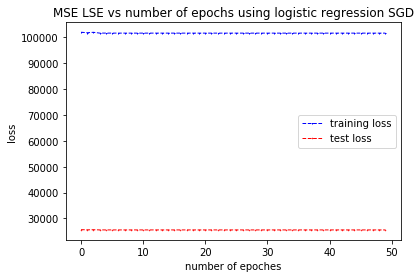

In [167]:
x = list(range(max_iters))
plt.plot(x, losses_train3, color='blue', marker='+', linestyle='dashed', label="training loss", markersize=1, linewidth=1)
plt.plot(x, losses_test3, color='red', marker='.', linestyle='dashed', label="test loss", markersize=1, linewidth=1)
plt.legend()
plt.title("MSE LSE vs number of epochs using logistic regression SGD")
plt.xlabel("number of epoches")
plt.ylabel("loss")
plt.show()

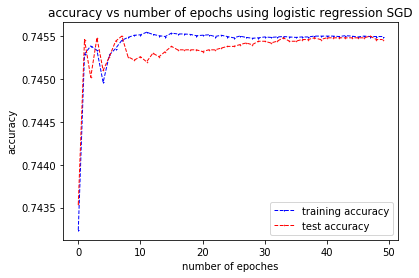

In [168]:
x = list(range(max_iters))
plt.plot(x, accuracies_train3, color='blue', marker='+', linestyle='dashed', label="training accuracy", markersize=1, linewidth=1)
plt.plot(x, accuracies_test3, color='red', marker='.', linestyle='dashed', label="test accuracy", markersize=1, linewidth=1)
plt.legend()
plt.title("accuracy vs number of epochs using logistic regression SGD")
plt.xlabel("number of epoches")
plt.ylabel("accuracy")
plt.show()

_B. Regularized Logistic Regression & test_

In [169]:
def cross_validation_regularised_log_reg(y, x, k_indices, k, lambda_):
    """Return the loss of regularized logistic regression."""
    # create indices and split data. 
    indices_train = k_indices[~(np.arange(k_indices.shape[0]) == k)].reshape(-1)
    indices_test = k_indices[k]
    
    x_tr = x[indices_train]
    x_te = x[indices_test]
    y_tr = y[indices_train]
    y_te = y[indices_test]
    
    x_tr = initial_process_data(x_tr)
    x_te = initial_process_data(x_te)
    
    initial_w = np.zeros(x_tr.shape[1])
    
    # Apply the regularised logistic regression
    w, loss_tr = reg_logistic_regression(y_tr, x_tr, lambda_, initial_w, 2, 0.0001)
     
    # Calculate the loss for test data
    loss_te = regularized_logistic_regression_loss(y_te, x_te, w, lambda_)

    return loss_tr, loss_te

In [170]:
nb_fold = 4
k_indices = build_k_indices(y_0_1_train, nb_fold, 1)
lambdas = np.logspace(-5, 0, 6)

best_lambda = 0
smallest_loss = float('inf')

for lambda_ in lambdas:
    for k in range(nb_fold):
        loss_tr, loss_te = cross_validation_regularised_log_reg(y_0_1_train, x_train, k_indices, k, lambda_)
        
        if loss_te < loss:
            smallest_loss = loss_te
            best_lambda = lambda_
            
print("best lambda = {l}".format(l=best_lambda))
print("smallest test loss = {l}".format(l=smallest_loss))

best lambda = 0
smallest test loss = inf


In [171]:
losses_train4 = []
losses_test4 = []
accuracies_train4 = []
accuracies_test4 = []


def reg_logistic_regression(y, tx, lambda_ , initial_w, max_iters, gamma):

    w = initial_w
    prev_loss = float('inf')
    
    for n_iter in range(max_iters):
        for batch_y, batch_x in batch_iter(y, tx, 1, num_batches=len(tx)):
            gradient = compute_gradient_logistic_loss_regularized(batch_y, batch_x, w, lambda_)
            w = w - gamma * gradient
        
   
        loss = regularized_logistic_regression_loss(y, tx, w, lambda_)
        if prev_loss <= loss:
            gamma *= 0.1
        prev_loss = loss
        
        
        y_pred_train = predict_labels(w, tx)
        y_pred_train[np.where(y_pred_train <= 0.5)] = -1
        y_pred_train[np.where(y_pred_train > 0.5)] = 1
        # IL FAUT CHANGER y_train car la taille est reduite avec k fold
        accuracy_train = compute_accuracy(y_train, y_pred_train)
        
        
        test_loss = regularized_logistic_regression_loss(y_0_1_test, x_test_clean, w, lambda_)
        y_pred_test = predict_labels(w, x_test_clean)
        y_pred_test[np.where(y_pred_test <= 0.5)] = -1
        y_pred_test[np.where(y_pred_test > 0.5)] = 1
        accuracy_test = compute_accuracy(y_test, y_pred_test)
        
        losses_train4.append(loss)
        losses_test4.append(test_loss)
        accuracies_train4.append(accuracy_train)
        accuracies_test4.append(accuracy_test)
        

    return w, loss

In [172]:
initial_w = np.zeros(x_train_clean.shape[1])
max_iters = 50
gamma = 0.001
lambda_ = 0


w, train_loss = reg_logistic_regression(y_0_1_train, x_train_clean, lambda_, initial_w, max_iters, gamma)
y_pred_train = predict_labels(w, x_train_clean)
y_pred_train[np.where(y_pred_train <= 0.5)] = -1
y_pred_train[np.where(y_pred_train > 0.5)] = 1
accuracy_train = compute_accuracy(y_train, y_pred_train)

y_pred_test = predict_labels(w, x_test_clean)
y_pred_test[np.where(y_pred_test <= 0.5)] = -1
y_pred_test[np.where(y_pred_test > 0.5)] = 1
accuracy_test = compute_accuracy(y_test, y_pred_test)

In [173]:
print("train loss = {l}".format(l=train_loss))
print("test loss = {l}".format(l=logistic_loss(y_0_1_test, x_test_clean, w)))
print("train accuracy = {a}".format(a=accuracy_train))
print("test accuracy = {a}".format(a=accuracy_test))

train loss = 101677.13405353318
test loss = 25536.69718479295
train accuracy = 0.7455
test accuracy = 0.74548


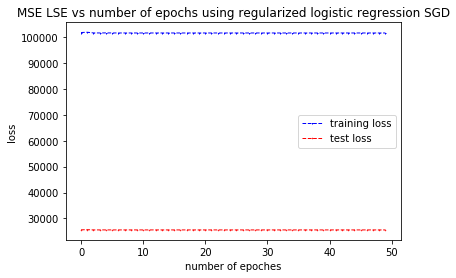

In [174]:
x = list(range(max_iters))
plt.plot(x, losses_train4, color='blue', marker='+', linestyle='dashed', label="training loss", markersize=1, linewidth=1)
plt.plot(x, losses_test4, color='red', marker='.', linestyle='dashed', label="test loss", markersize=1, linewidth=1)
plt.legend()
plt.title("MSE LSE vs number of epochs using regularized logistic regression SGD")
plt.xlabel("number of epoches")
plt.ylabel("loss")
plt.show()

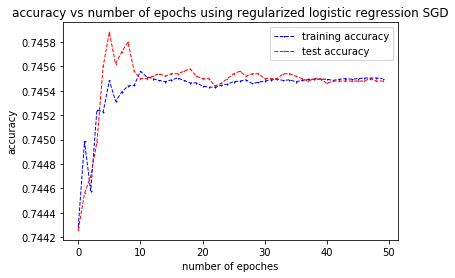

In [175]:
x = list(range(max_iters))
plt.plot(x, accuracies_train4, color='blue', marker='+', linestyle='dashed', label="training accuracy", markersize=1, linewidth=1)
plt.plot(x, accuracies_test4, color='red', marker='.', linestyle='dashed', label="test accuracy", markersize=1, linewidth=1)
plt.legend()
plt.title("accuracy vs number of epochs using regularized logistic regression SGD")
plt.xlabel("number of epoches")
plt.ylabel("accuracy")
plt.show()

**3. Test on full processed data**

In [180]:
x_train_processed = full_process_data(data, 8, DATA_TRAIN_PATH, [])
x_test_processed = full_process_data(data, 8, DATA_TRAIN_PATH, [])

A. Ridge regression

In [181]:
def cross_validation_ridge2(y, x, k_indices, k, lambda_):
    """Perform a cross validation using ridge regression."""
    # Create indices and split data. 
    indices_train = k_indices[~(np.arange(k_indices.shape[0]) == k)].reshape(-1)
    indices_test = k_indices[k]
    
    x_tr = x[indices_train]
    x_te = x[indices_test]
    y_tr = y[indices_train]
    y_te = y[indices_test]
    
    x_tr = full_process_data(x_tr, 8, DATA_TRAIN_PATH, [])
    x_te = full_process_data(x_te, 8, DATA_TRAIN_PATH, [])
    
    # Compute w with ridge regression .
    w, loss_tr = ridge_regression(y_tr, x_tr, lambda_)
     
    # Calculate the loss for test data
    loss_te = MSE_loss(y_te, x_te, w)

    return loss_tr, loss_te

In [182]:
nb_fold = 4
k_indices = build_k_indices(y_train, nb_fold, 1)
lambdas = np.logspace(-5, 0, 6)

best_lambda = 0
smallest_loss = float('inf')

losses_tr = []
losses_te = []

# Test different lambdas values for the ridge regression using cross validation.
for lambda_ in lambdas:
    losses_l_tr = []
    losses_l_te = []
    for k in range(nb_fold):
        loss_tr, loss_te = cross_validation_ridge2(y_train, x_train, k_indices, k, lambda_)
        
        if loss_te < loss:
            smallest_loss = loss_te
            best_lambda = lambda_
    
            
print("best lambda = {l}".format(l=best_lambda))
print("smallest test loss = {l}".format(l=smallest_loss))

best lambda = 0.1
smallest test loss = 0.29647356945884235


In [183]:
# Compute w using ridge regression.
w, train_loss = ridge_regression(y_train, x_train_processed, best_lambda)

#Compute the training accuracy
y_pred_train = predict_labels(w, x_train_processed)
accuracy_train = compute_accuracy(y_train, y_pred_train)

#Compute the test accuracy
y_pred_test = predict_labels(w, x_test_processed)
accuracy_test = compute_accuracy(y_test, y_pred_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 200000 is different from 250000)

B. Regularised Logistic regression

In [ ]:
def cross_validation_regularised_log_reg2(y, x, k_indices, k, lambda_):
    """Return the loss of regularized logistic regression."""
    # create indices and split data. 
    indices_train = k_indices[~(np.arange(k_indices.shape[0]) == k)].reshape(-1)
    indices_test = k_indices[k]
    
    x_tr = x[indices_train]
    x_te = x[indices_test]
    y_tr = y[indices_train]
    y_te = y[indices_test]
    
    x_tr = full_process_data(x_tr, 8, DATA_TRAIN_PATH, [])
    x_te = initial_process_data(x_te, 8, DATA_TRAIN_PATH, [])
    
    initial_w = np.zeros(x_tr.shape[1])
    
    # Apply the regularised logistic regression
    w, loss_tr = reg_logistic_regression(y_tr, x_tr, lambda_, initial_w, 2, 0.0001)
     
    # Calculate the loss for test data
    loss_te = regularized_logistic_regression_loss(y_te, x_te, w, lambda_)

    return loss_tr, loss_te

In [ ]:
nb_fold = 4
k_indices = build_k_indices(y_0_1_train, nb_fold, 1)
lambdas = np.logspace(-5, 0, 6)

best_lambda = 0
smallest_loss = float('inf')

for lambda_ in lambdas:
    for k in range(nb_fold):
        loss_tr, loss_te = cross_validation_regularised_log_reg2(y_0_1_train, x_train, k_indices, k, lambda_)
        
        if loss_te < loss:
            smallest_loss = loss_te
            best_lambda = lambda_
            
print("best lambda = {l}".format(l=best_lambda))
print("smallest test loss = {l}".format(l=smallest_loss))

In [ ]:
losses_train4 = []
losses_test4 = []
accuracies_train4 = []
accuracies_test4 = []


def reg_logistic_regression(y, tx, lambda_ , initial_w, max_iters, gamma):

    w = initial_w
    prev_loss = float('inf')
    
    for n_iter in range(max_iters):
        for batch_y, batch_x in batch_iter(y, tx, 1, num_batches=len(tx)):
            gradient = compute_gradient_logistic_loss_regularized(batch_y, batch_x, w, lambda_)
            w = w - gamma * gradient
        
   
        loss = regularized_logistic_regression_loss(y, tx, w, lambda_)
        if prev_loss <= loss:
            gamma *= 0.1
        prev_loss = loss    

    return w, loss

In [ ]:
initial_w = np.zeros(x_train_clean.shape[1])
max_iters = 50
gamma = 0.001
lambda_ = 0


w, train_loss = reg_logistic_regression(y_0_1_train, x_train_processed, lambda_, initial_w, max_iters, gamma)
y_pred_train = predict_labels(w, x_train_processed)
y_pred_train[np.where(y_pred_train <= 0.5)] = -1
y_pred_train[np.where(y_pred_train > 0.5)] = 1
accuracy_train = compute_accuracy(y_train, y_pred_train)

y_pred_test = predict_labels(w, x_test_clean)
y_pred_test[np.where(y_pred_test <= 0.5)] = -1
y_pred_test[np.where(y_pred_test > 0.5)] = 1
accuracy_test = compute_accuracy(y_test, y_pred_test)